# Курсовая работа по дисциплине ФКИИ.

# Исследование датасета "CIFAR-10"


## Описание датасета: ##

Датасет CIFAR-10 состоит из 60 000 цветных изображений размером 32x32 пикселя, разделённых на 10 классов, по 6000 изображений в каждом классе. Из них 50 000 изображений предназначены для обучения, а 10 000 — для тестирования.

Датасет разделён на пять обучающих партий и одну тестовую партию, каждая из которых содержит 10 000 изображений. Тестовая партия содержит ровно 1000 случайным образом выбранных изображений из каждого класса. Обучающие партии содержат оставшиеся изображения в случайном порядке, но некоторые обучающие партии могут содержать больше изображений одного класса, чем другого. В общей сложности обучающие партии содержат ровно 5000 изображений из каждого класса.

Вот классы в датасете, а также 10 случайных изображений из каждого:

![image1](image1.webp)


Классы в датасете полностью взаимно исключающие. Нет перекрытия между автомобилями и грузовиками. Класс "Автомобиль" включает седаны, внедорожники и подобные им транспортные средства. Класс "Грузовик" включает только большие грузовики. Ни в одном классе нет пикапов.

---

# DataLoader реализован при помощи pickle: #

Downloading...
From (original): https://drive.google.com/uc?export=download&id=11vbzi4NFTU1gqZP6DGXO8AJ8NbV5fqyH
From (redirected): https://drive.google.com/uc?export=download&id=11vbzi4NFTU1gqZP6DGXO8AJ8NbV5fqyH&confirm=t&uuid=daa0238f-6e19-46cf-a857-4674fa810787
To: c:\Users\sgs-w\OneDrive\Рабочий стол\Курсач\data.tar.gz
100%|██████████| 170M/170M [00:41<00:00, 4.08MB/s] 


Архив распакован в: ./cifar_data


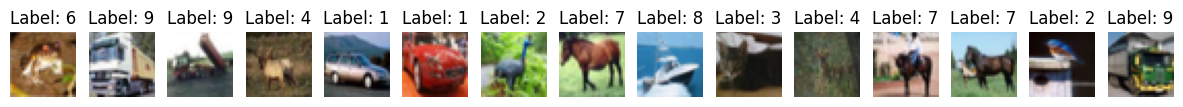

In [14]:
import os
import pickle
import numpy as np
import tarfile
import gdown
from PIL import Image
import matplotlib.pyplot as plt

def download_from_google_drive(file_id, output_path):
    url = f'https://drive.google.com/uc?export=download&id={file_id}'
    gdown.download(url, output_path, quiet=False)

def extract_tar_gz(file_path, extract_to):
    with tarfile.open(file_path, "r:gz") as tar:
        tar.extractall(path=extract_to)
        print(f"Архив распакован в: {extract_to}")

def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

file_id = '11vbzi4NFTU1gqZP6DGXO8AJ8NbV5fqyH'  # Замените на свой ID файла
data_dir = './cifar_data/cifar-10-batches-py'  # Путь к распакованному файлу
batch_files = ['data_batch_1']

download_from_google_drive(file_id, 'data.tar.gz')
extract_tar_gz('data.tar.gz', './cifar_data')

batch_file = batch_files[0]
batch_data = unpickle(os.path.join(data_dir, batch_file))

data = batch_data[b"data"][:15]  
labels = batch_data[b"labels"][:15]  

fig, axes = plt.subplots(1, 15, figsize=(15, 15))
for i, img_data in enumerate(data):
    img = Image.fromarray(np.transpose(img_data.reshape(3, 32, 32), (1, 2, 0)))
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Label: {labels[i]}")

plt.show()


---

# Смотрим статистику какую-то которая в голову пришла #

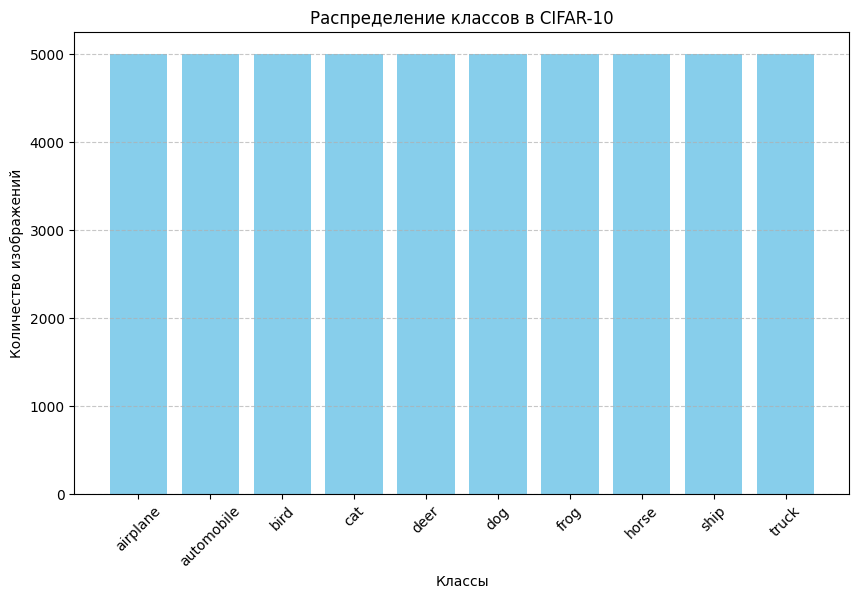

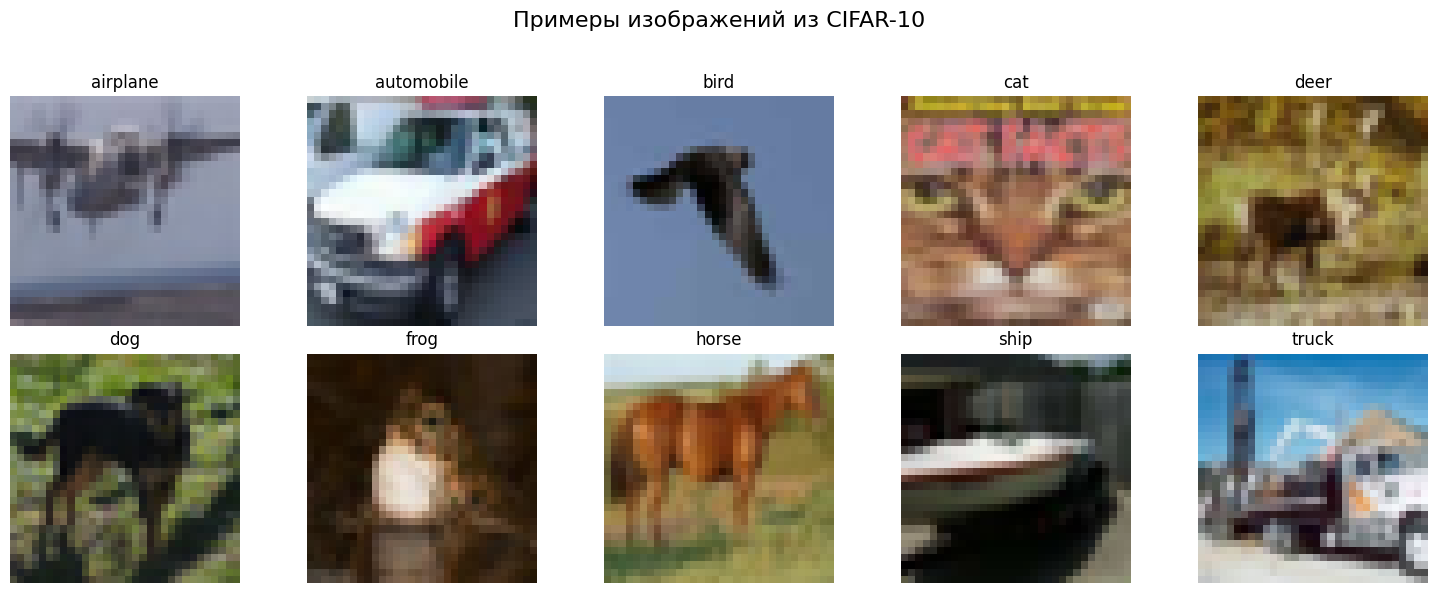

Общее количество изображений: 50000
Количество признаков на изображение: 3072
Количество классов: 10
Процентное распределение классов:
  frog: 10.00%
  truck: 10.00%
  deer: 10.00%
  automobile: 10.00%
  bird: 10.00%
  horse: 10.00%
  ship: 10.00%
  cat: 10.00%
  dog: 10.00%
  airplane: 10.00%


In [15]:
import matplotlib.pyplot as plt
from collections import Counter

batch_files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']

all_data = []
all_labels = []
for batch_file in batch_files:
    batch_data = unpickle(os.path.join(data_dir, batch_file))
    all_data.append(batch_data[b"data"])
    all_labels.extend(batch_data[b"labels"])

data = np.vstack(all_data)  # Все изображения (50000, 3072)
labels = np.array(all_labels)  # Метки классов (50000,)

label_names = unpickle(os.path.join(data_dir, 'batches.meta'))[b"label_names"]
label_names = [name.decode('utf-8') for name in label_names]

class_counts = Counter(labels)
plt.figure(figsize=(10, 6))
plt.bar(label_names, [class_counts[i] for i in range(len(label_names))], color='skyblue')
plt.title("Распределение классов в CIFAR-10")
plt.xlabel("Классы")
plt.ylabel("Количество изображений")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    random_idx = np.random.choice(np.where(labels == i)[0])
    img = data[random_idx].reshape(3, 32, 32).transpose(1, 2, 0)  # Преобразуем в изображение
    ax.imshow(img.astype('uint8'))
    ax.set_title(label_names[i])
    ax.axis('off')
plt.suptitle("Примеры изображений из CIFAR-10", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

num_samples = data.shape[0]
num_features = data.shape[1]
num_classes = len(label_names)
class_percentage = {label_names[key]: (value / num_samples) * 100 for key, value in class_counts.items()}

print(f"Общее количество изображений: {num_samples}")
print(f"Количество признаков на изображение: {num_features}")
print(f"Количество классов: {num_classes}")
print("Процентное распределение классов:")
for class_name, percentage in class_percentage.items():
    print(f"  {class_name}: {percentage:.2f}%")


Выбросов тут нет вообще, датасет составлен так, чтобы классы были уникальными и не перекрывали друг друга

---

# Алгоритм: #

Классификация изображений. 


Надо расписать вот по этой статье https://arxiv.org/pdf/2010.11929v2 там хорошо отработала моделька "ViT-H/14"


---
# Сравнение датасета с аналогами # 



---

# Список литературы и источников:

1. Learning Transferable Architectures for Scalable Image Recognition
Barret Zoph, Vijay Vasudevan (2018). Learning Transferable Architectures for Scalable Image Recognition. Retrieved from https://paperswithcode.com/paper/learning-transferable-architectures-for
2. Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks
Radford A., Metz L., & Chintala S. (2015). Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks. Retrieved from https://paperswithcode.com/paper/unsupervised-representation-learning-with-1
3. RegNet: Self-Regulated Network for Image Classification
Xu, J., Pan, Y., Pan, X., Hoi, S., Yi, Z., & Xu, Z. (2021). RegNet: Self-Regulated Network for Image Classification. Retrieved from https://paperswithcode.com/paper/regnet-self-regulated-network-for-image